In [3]:
pip install open-cv python


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement open-cv (from versions: none)
ERROR: No matching distribution found for open-cv

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\itsmo\appdata\local\programs\python\python312\lib\site-packages (1.26.4)




[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install opencv-python-headless


  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib


  Using cached contourpy-1.2.1-cp312-cp312-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     ------ ------------------------------ 30.7/165.9 kB 660.6 kB/s eta 0:00:01
     ---------------------------- --------- 122.9/165.9 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 1.7 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.0 MB 6.9 MB/s eta 0:00:02
   - -------------------------------------- 0.4/8.0 MB 4.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/8.0 MB 3.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/8.0 MB 3.7 MB/s eta 0:00:03
   --- --------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


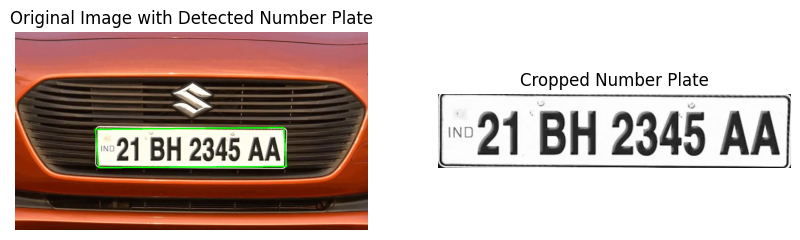

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_number_plate(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Image not found or unable to load. Check the file path and ensure the file exists.")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blurred, 50, 200)

    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    number_plate_contour = None

    for contour in contours:
        epsilon = 0.018 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:
            number_plate_contour = approx
            break

    if number_plate_contour is None:
        print("Number plate contour not found")
        return None

    cv2.drawContours(image, [number_plate_contour], -1, (0, 255, 0), 3)

    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [number_plate_contour], 0, 255, -1)
    new_image = cv2.bitwise_and(image, image, mask=mask)

    x, y, w, h = cv2.boundingRect(number_plate_contour)
    cropped_number_plate = gray[y:y+h, x:x+w]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image with Detected Number Plate')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Cropped Number Plate')
    plt.imshow(cropped_number_plate, cmap='gray')
    plt.axis('off')

    plt.show()

    return cropped_number_plate

image_path = r"C:\Users\itsmo\Downloads\Car.webp"  
cropped_number_plate = detect_number_plate(image_path)

if cropped_number_plate is not None:
    cv2.imwrite('cropped_number_plate.jpg', cropped_number_plate)

